In [ ]:
def add(a,b):
  return a+b

In [ ]:
add(4,5)

9

In [ ]:
add("hey","sachin")

'heysachin'

In [ ]:
add("hello", 3) # cant concatenate two different data type

TypeError: ignored

In [ ]:
fl = open('blah.txt', 'wt') # r/w/a , text mode or binary mode
fl.write(add("hi","sachin"))
fl.close()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
# downloading the dataset
!wget https://raw.githubusercontent.com/a-forty-two/CGI-DPplusPy/main/breastcancer_data.csv

--2022-09-07 06:45:35--  https://raw.githubusercontent.com/a-forty-two/CGI-DPplusPy/main/breastcancer_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80005 (78K) [text/plain]
Saving to: ‘breastcancer_data.csv’

breastcancer_data.c 100%[===================>]  78.13K  --.-KB/s    in 0.01s   

2022-09-07 06:45:35 (6.23 MB/s) - ‘breastcancer_data.csv’ saved [80005/80005]



In [ ]:
# importing the dataset
df=pd.read_csv('breastcancer_data.csv')

In [ ]:
df.head() #gives the topmost rows from the dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1138 non-null   int64  
 1   diagnosis               1138 non-null   object 
 2   radius_mean             1138 non-null   float64
 3   texture_mean            1138 non-null   float64
 4   perimeter_mean          1138 non-null   float64
 5   area_mean               1138 non-null   float64
 6   smoothness_mean         1138 non-null   float64
 7   compactness_mean        1138 non-null   float64
 8   concavity_mean          1138 non-null   float64
 9   symmetry_mean           1138 non-null   float64
 10  fractal_dimension_mean  1138 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 97.9+ KB


In [ ]:
df.shape #shape of the dataset  

(1138, 11)

In [ ]:
df.columns # columns names 

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [ ]:
#checking the null values
df.isna().sum()

id                        0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

We can see that our data is clean so there is need for imputation.

In [ ]:
df.describe().T #gives the statistical inference of the dataset

,count,mean,std,min,25%,50%,75%,max
id,1138.0,1.523243e+07,8.965268e+07,8670.00000,92995.25000,93279.50000,906012.50000,9.113205e+08
radius_mean,1138.0,1.412729e+01,3.522499e+00,6.98100,11.70000,13.37000,15.78000,2.811000e+01
texture_mean,1138.0,1.928965e+01,4.299144e+00,9.71000,16.17000,18.84000,21.80000,3.928000e+01
perimeter_mean,1138.0,9.196903e+01,2.428829e+01,43.79000,75.17000,86.24000,104.10000,1.885000e+02
area_mean,1138.0,6.548891e+02,3.517593e+02,143.50000,420.30000,551.10000,782.70000,2.501000e+03
smoothness_mean,1138.0,9.636028e-02,1.405794e-02,0.05263,0.08637,0.09587,0.10530,1.634000e-01
compactness_mean,1138.0,1.043410e-01,5.278953e-02,0.01938,0.06492,0.09263,0.13040,3.454000e-01
concavity_mean,1138.0,8.879932e-02,7.968474e-02,0.00000,0.02956,0.06154,0.13070,4.268000e-01
symmetry_mean,1138.0,1.811619e-01,2.740222e-02,0.10600,0.16190,0.17920,0.19570,3.040000e-01
fractal_dimension_mean,1138.0,6.279761e-02,7.057257e-03,0.04996,0.05770,0.06154,0.06612,9.744000e-02


In [ ]:
#Let us see which columns hold numerical cols and categorical values
num_col=df.select_dtypes(include=np.number).columns.tolist()
cat_col=df.select_dtypes(include=object).columns.tolist()
print('num_col:',num_col) # prints columns which have numerical values
print('cat_col:',cat_col) # prints columns which have categorical values

num_col: ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean']
cat_col: ['diagnosis']


In [ ]:
# let us check the correlations 
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,1.000000,0.052010,0.069534,0.050988,0.067529,-0.009038,0.000067,0.034903,-0.015412,-0.036598
radius_mean,0.052010,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.147741,-0.311631
texture_mean,0.069534,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.071401,-0.076437
perimeter_mean,0.050988,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.183027,-0.261477
area_mean,0.067529,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.151293,-0.283110
smoothness_mean,-0.009038,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.557775,0.584792
compactness_mean,0.000067,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.602641,0.565369
concavity_mean,0.034903,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.500667,0.336783
symmetry_mean,-0.015412,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,1.000000,0.479921
fractal_dimension_mean,-0.036598,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.479921,1.000000



radius_mean is highly correlated with perimete_mean and area_mean
 


# Exploratory data analysis

In [ ]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


[Text(0, 0.5, 'texture mean'), Text(0.5, 0, 'perimeter mean')]

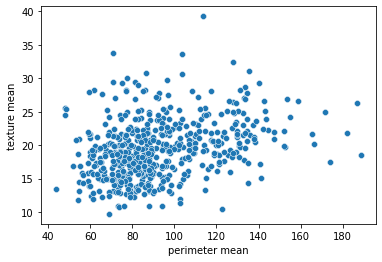

# Countplot for diagnosis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


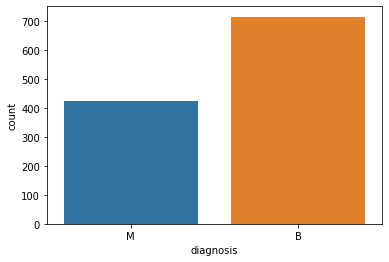

In [ ]:
sns.countplot(df['diagnosis']);

* Number of Benign:  700
* Number of Malignant :  400

# Scater plot between permieter mean and area mean

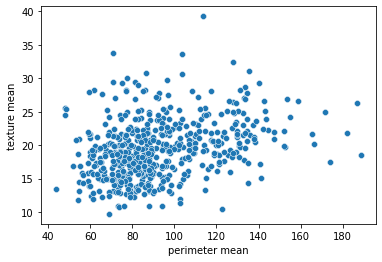

In [ ]:
plot1=sns.scatterplot(x='perimeter_mean',y='texture_mean',data=df);
plot1.set(xlabel='perimeter mean',ylabel='texture mean');

We can see that most of the values are scattered whose perimeter_mean is  between 60 and 90 with texture_mean between 15 and 22.

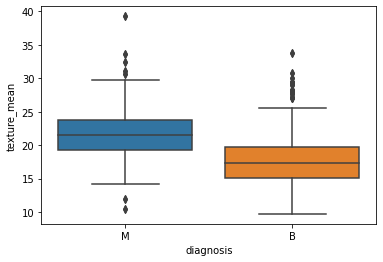

In [ ]:
sns.boxplot(x='diagnosis',y='texture_mean',data = df)

* There are outliers in both daigonsis for 'M' and 'B'. 
* For diagnosis'M" ouliers are present belowlower bound and outside  upper bound.
* For diagonis 'B' outliers are present only outside upper bound.

# Strip Plot

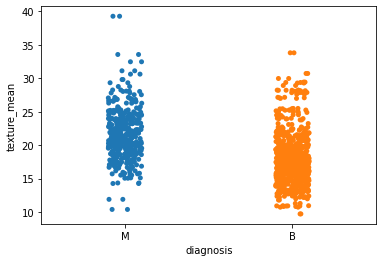

In [ ]:
sns.stripplot(x='diagnosis',y='texture_mean',data=df);

# Joint Plot

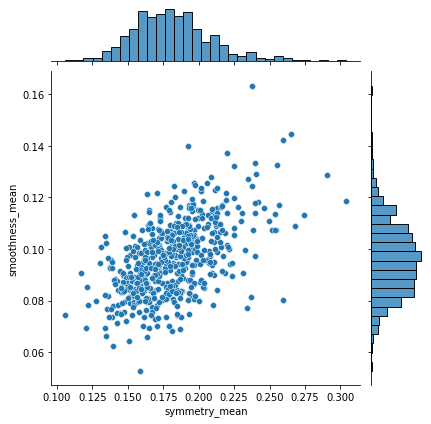

In [ ]:
sns.jointplot(x='symmetry_mean',y='smoothness_mean',data = df);

# pair plot

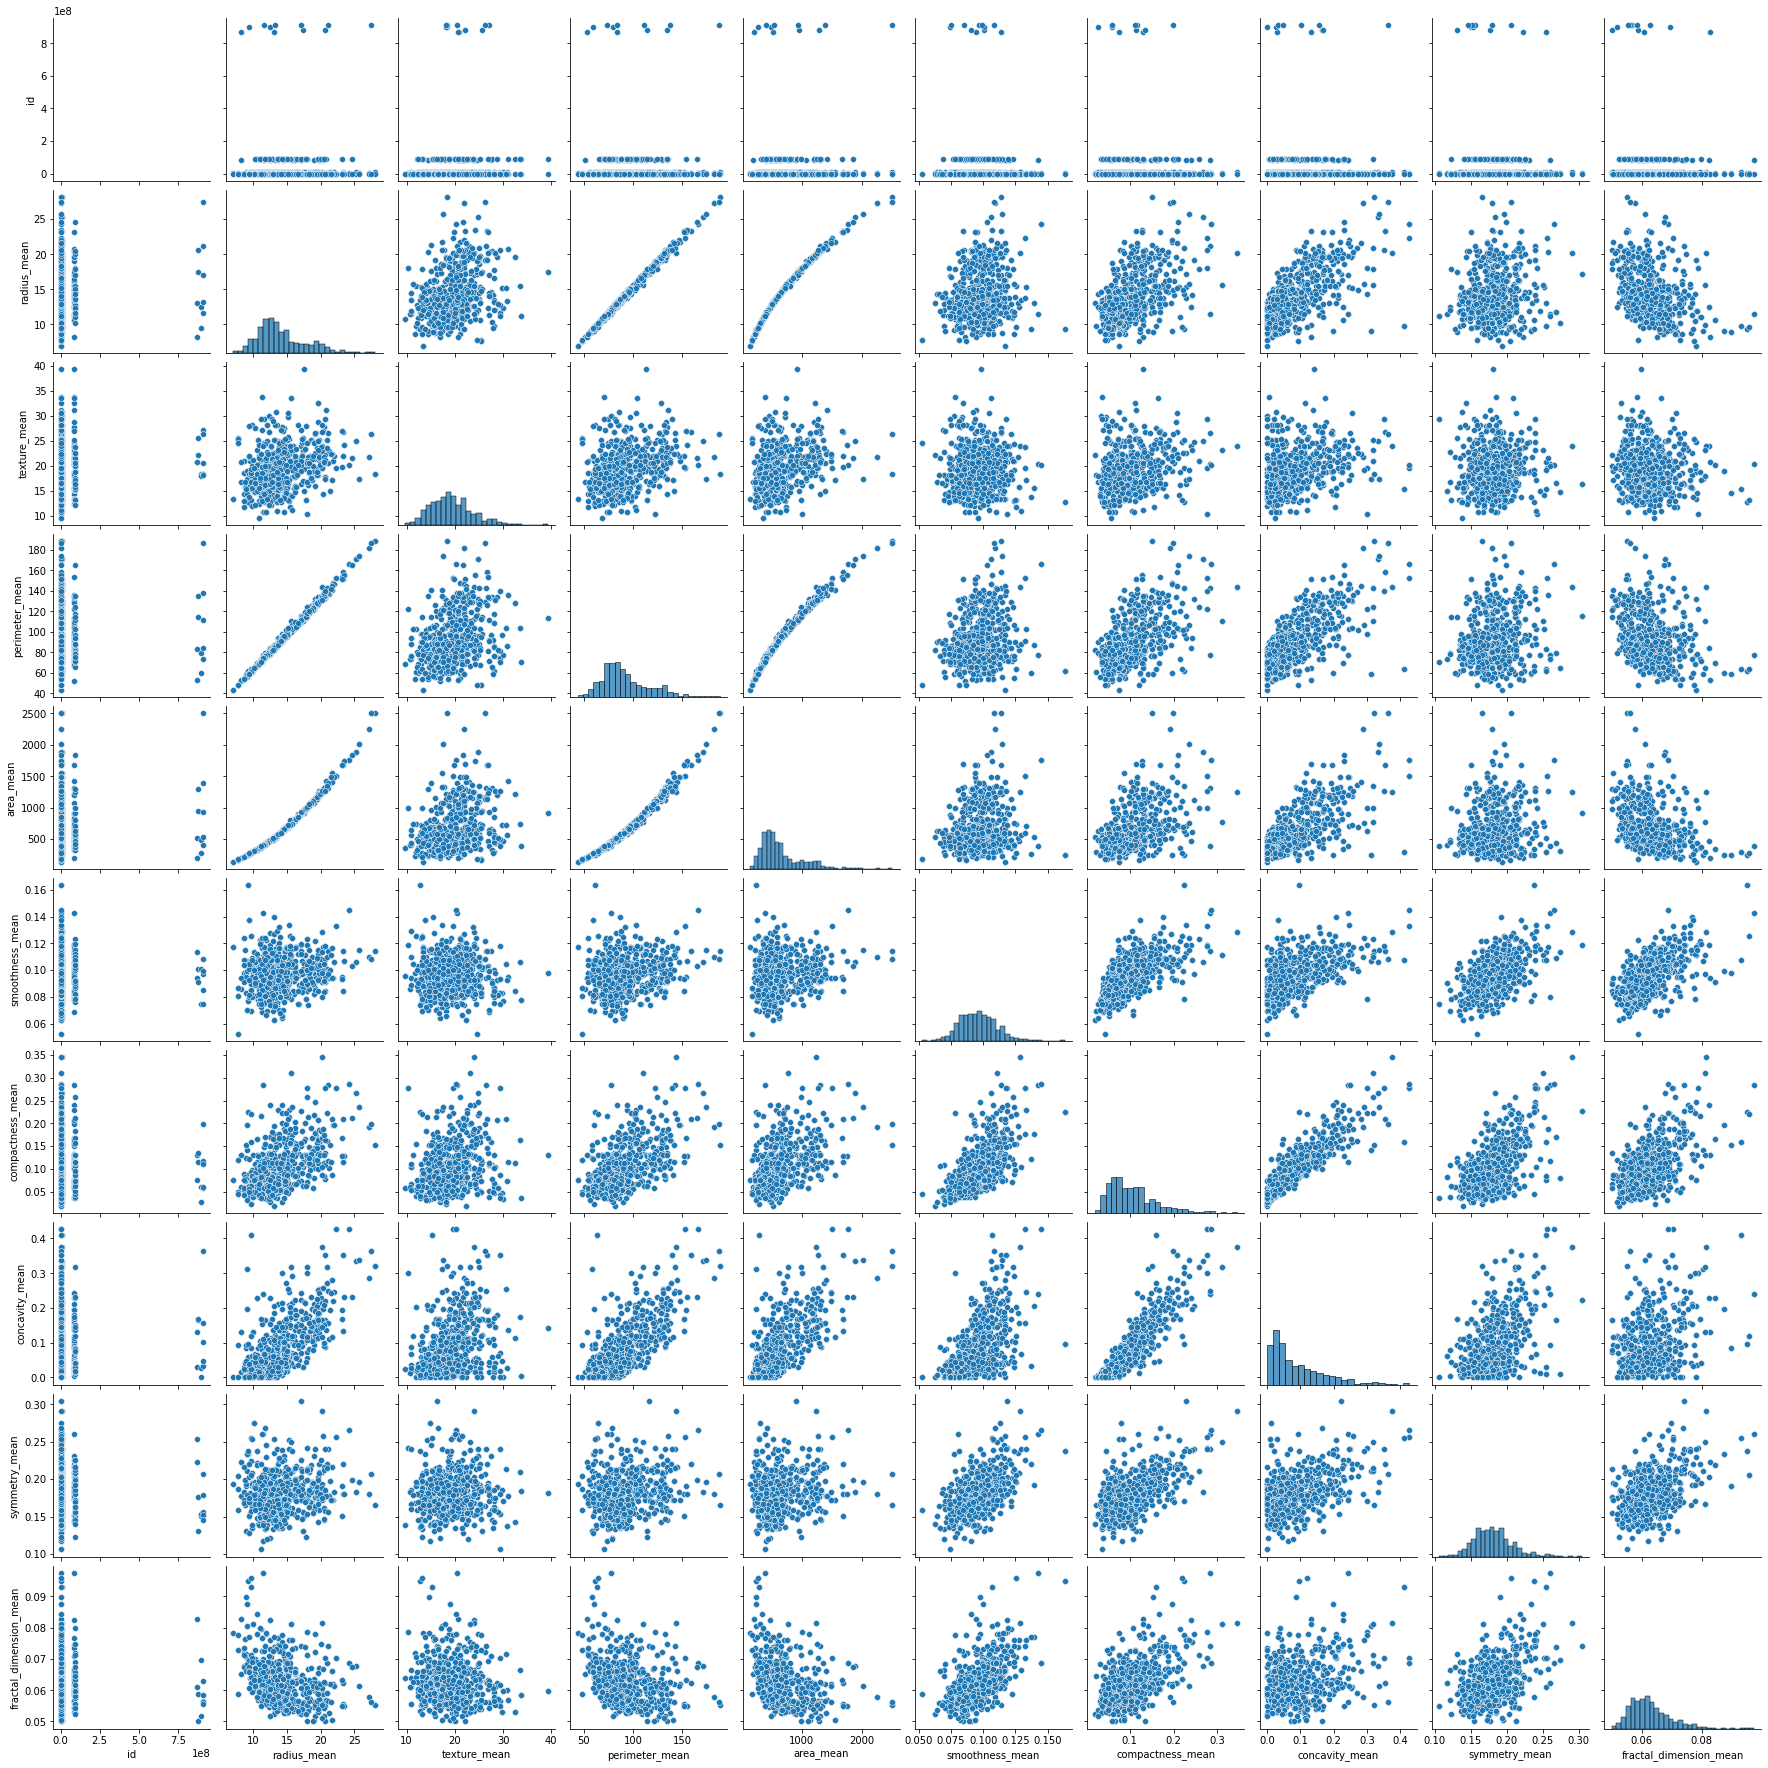

In [ ]:
sns.pairplot(df)

# Checking the skewness for all the columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


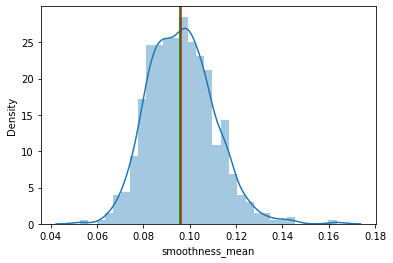

In [ ]:
sns.distplot(df.smoothness_mean)
plt.axvline(df.smoothness_mean.mean(),color='red')
plt.axvline(df.smoothness_mean.median(),color='green')

As we can see that mean,mode and median lie on same point so we can say that it follows normal distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


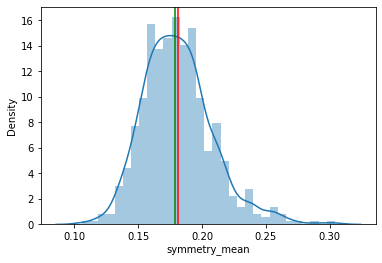

In [ ]:
sns.distplot(df['symmetry_mean'])
plt.axvline(df.symmetry_mean.mean(),color='red')
plt.axvline(df.symmetry_mean.median(),color='green')

As we can see that mean,median is approximately equal to mode of the symmetry_mean.We can say that it follows normal distribution which is symmetric.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


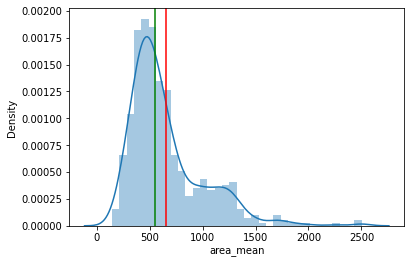

In [ ]:
sns.distplot(df['area_mean'])
plt.axvline(df.area_mean.mean(),color='red')
plt.axvline(df.area_mean.median(),color='green')

We can see that mean>median>mode so area_mean is right skewed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


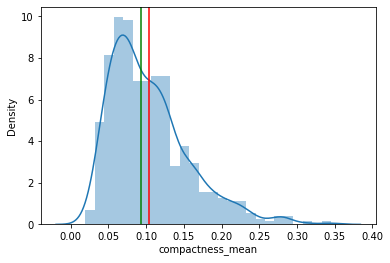

In [ ]:
sns.distplot(df['compactness_mean'])
plt.axvline(df.compactness_mean.mean(),color='red')
plt.axvline(df.compactness_mean.median(),color='green')

We can see that mean>median>mode so compactness_mean is right skewed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


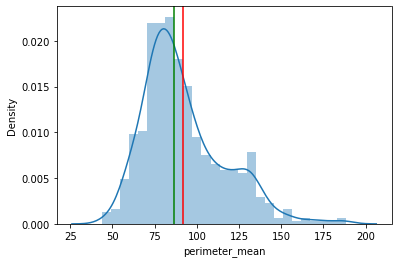

In [ ]:
sns.distplot(df['perimeter_mean'])
plt.axvline(df.perimeter_mean.mean(),color='red')
plt.axvline(df.perimeter_mean.median(),color='green')

We can see that mean>median>mode so perimeter_mean is right skewed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


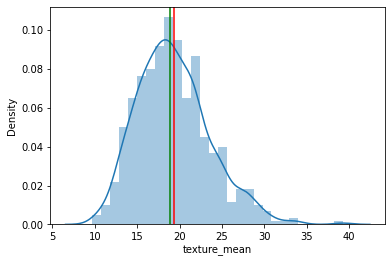

In [ ]:
sns.distplot(df['texture_mean'])
plt.axvline(df.texture_mean.mean(),color='red')
plt.axvline(df.texture_mean.median(),color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


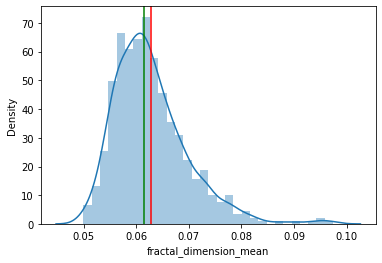

In [ ]:
sns.distplot(df['fractal_dimension_mean'])
plt.axvline(df.fractal_dimension_mean.mean(),color='red')
plt.axvline(df.fractal_dimension_mean.median(),color='green')

We can see that mean>median>mode so fractal_dimension_mean is right skewed.

In [ ]:
# List
# ORDERED-> once created, ORDER DOES not change
l1 = [2, 111,0, 'hi sachin', '<input type="button">Click here</input>', False]

In [ ]:
l1

[2, 111, 0, 'hi sachin', '<input type="button">Click here</input>', 'False']

In [ ]:
#Indexed
l1[0]# first element

2

In [ ]:
# NEGATIVE INDEXING-> right to left
l1[-1] # last element

False

In [ ]:
cat = [ 1, 2, 2, 1, 'banana', 99, False, 3.14, 'buffalo']
# List is ORDERED, INDEXED
set1 = set(cat)
set1
# UNORDERED

{1, 2, 3.14, 99, False, 'banana', 'buffalo'}

In [ ]:
# INDEXING-> undefined 
set1[2]

TypeError: ignored

In [ ]:
set2 = {ls} # an ordered, indexed collection CANNOT become a part of UNORDERED,
# unindexed collection!!!!

NameError: ignored

In [ ]:
tup = (1,2,3) # READONLY data-> once created, cannot be modified!!!


In [ ]:
print(l1)
del l1[-1]
print(l1)

[2, 3, 4, 5, 2, -1, [2, 111, 0, 'hi sachin', '<input type="button">Click here</input>', False]]
[2, 3, 4, 5, 2, -1]


In [ ]:
# Dictionary-> Key,value pairs!!!! 
# SETS-> combinations of KEY cannot repeat
# ORDERED-> NO!!!
# INDEXED-> YES! Indexes are KEY, not [0...1]

In [ ]:
dct = {0:"hello", 4.12:"World", False:True, 'pikachu':'otter'}
# key:value
dct[4.12]#INDEXED!

'World'

In [ ]:
dct["pikachu"] #INDEXED!

'otter'

In [ ]:
dct[-1]

KeyError: ignored

In [ ]:
# functions, classes
# def <function_name> (parameters):
#   command1
#<-> indentation space from left-> is important
# { } -> scope, in python the space from left defines the scope!
# PREFERENCE-> TAB over SPACE

In [ ]:
# Functions can return multiple values!
def divide(a,b):
  q = int(a/b) # TYPE CASTE
  r = a%b
  return q,r # returning 2 independent units

a,b = divide(5,2)
print(a,b)

2 1


In [ ]:

# Functions can return multiple values!
def divide(a,b):
  q = int(a/b) # TYPE CASTE
  r = a%b
  return (q,r) # returning 1 independent unit-> tuple

a = divide(5,2)
print(a)
print(a[0])


(2, 1)
2


In [ ]:
# lambda function -> anonymous functions 
# 1 line of exection NOT more!!!
# In-Place-> no jump in memory for a separate function call!
# EXECUTION is faster! -> only allocate finite memory, hence ONLY 1 line of execution is allowed!

# K = C+ 273
# variable = lambda <input>: what happens with input!
convert_to_kelvin = lambda x: x+273
convert_to_kelvin(100)

373

In [ ]:
# y = mx + c
y = lambda m,x,c: m*x + c
y(1,2,0)

2

In [ ]:
# Loops-> do_while, while, for, foreach 

# for var in list-> var will iterate through the provided list!
for i in [1,2,3,4,5,6]:
  print(i)

1
2
3
4
5
6


In [ ]:
# FOR ITERATES OVER A LIST ONLY!!!!
for i in l1:
  print(i)


2
3
4
5
2
-1


In [ ]:
counter = len(l1) -1
while(counter>=0):
  print(l1[counter])
  counter = counter - 1

-1
2
5
4
3
2


In [ ]:
# LIST COMPREHENSIONS
# LOGIC that can be provided to GENERATE a list!!!!
# output = [(modification on value)  a loop to iterate a value    ]
randomvalues = [ str(i)+'bye' for i in l1]
randomvalues

['2bye', '3bye', '4bye', '5bye', '2bye', '-1bye']

In [ ]:
# squares of all numbers between 1 to 10
base = [ i for i in range(10)]
base

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
squares = [ i*i for i in base]
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [ ]:
# combining regular lambdas with functions 
def mathpower(y):
  return lambda x: x**y #**->power, ^-> xor

squares = mathpower(2) # lambda x,2: x**2
cube = mathpower(3) # lambda x,3: x**3
# mathematical-> Finance, insurance
# ML-> feature engineering
# ETL-> collect-> modify it in many ways, and load somewhere else

# Delta-> Bronze (Dirty data), Silver (cleaned featured), Gold (ready for ML or DA)
# raw data-> in bronze
# Cell Analogy-> Radiography-> radius of a cell, area, perimeter, pi*r2, pi*2*r 
# FUNCTIONS-> memory jump-> Preference is for lambdas-> 1 expression-> in memory, in place 
# Derived Columns (formulae based)
# Generate Values!

In [ ]:
squares(30)

900

In [ ]:
cube(8)

512

In [ ]:
class myclass:
  def blahblah(): #this function will NOT be a part of my classes
    return 'bye bye'
  def blah2(this): # this function will be a part of my class
    return 'yoo hoo'

In [ ]:
# OBJECT of a class
obj = myclass() # new objects 
print(obj.blah2()) # this should work
print(obj.blahblah()) # this should be an error

yoo hoo


TypeError: ignored

In [ ]:
class human:
  def __init__(this):
    this.name = "jane doe"
    this.age = 1000
    this.currency = 'SGD'
    this.hungerStatus = False
  def setNewProperties(this, name, age):
    this.name = name
    this.age = age
  def getHumanProperties(this):
    return this.name, this.age, this.currency, ("hungry" if this.hungerStatus==True else "Not Hungry")

In [ ]:
pikachu = human()
pikachu.getHumanProperties()

('jane doe', 1000, 'SGD', 'Not Hungry')

In [ ]:
# NOT-> POLYMORPHISM
# DOES NOT 
class abc:
  def mul(this, a,b):
    return a*b
  def mul(this, a):
    return a*a

ob = abc()
print(ob.mul(3)) # this should work
print(ob.mul(3,2)) # this should NOT work! PREVIOUS DEF has been OVERRIDDEN by new def!!1

9


TypeError: ignored

In [ ]:
class ArithmeticProg:
  def __iter__(self):
    self.base = -1
    self.step = 2
    return self
  def __next__(self):
    self.base = self.base + self.step
    return self.base

In [ ]:
obj = ArithmeticProg()
i = iter(obj)
# initialize series

In [ ]:
# next will propagate
for j in range(10):
  print(next(i))

1
3
5
7
9
11
13
15
17
19


In [ ]:
class Fibo:
  def __iter__(fibo):
    fibo.first = -1
    fibo.second = 1
    return fibo
  def __next__(fibo):
    fibo.third = fibo.first + fibo.second # 0
    fibo.first = fibo.second # 
    fibo.second = fibo.third

    return fibo.third


In [ ]:
i = iter(Fibo())
for j in range(10):
  print(next(i))

0
1
1
2
3
5
8
13
21
34


In [ ]:

# Datasets
age = [1,2,3,4,5,6,7,8,8,8]
name = ['John','Paul','John','Paul','John','Paul','John','Paul','Rattatoo','Jojo']
# TABULAR-> relationship-> Associates columns together in form of ROWS
# DataFrame
import pandas as pd # panel dataframes
df = pd.DataFrame(
    {'age':age,
    'name':name}
)

In [ ]:
# NAME of columns, or INDEX of the columns
# loc-> location selection, iloc-> index of location selection
# individual number, ranges, pandas has KNOWN issues with Negative indexing in rows!!!
# Negative index-> Right to left
df.loc[ 2:5, ['age']] # SLICING and DICING datasets!

,age
2,3
3,4
4,5
5,6


In [ ]:
df.iloc[ 2:5, [1]]

,name
2,John
3,Paul
4,John
